In [3]:
%ls

purchase.csv  sample_data/


In [4]:
import pandas as pd
purchase = pd.read_csv('purchase.csv')

In [5]:
from sklearn.preprocessing import StandardScaler
x = purchase[['Age','EstimatedSalary']]

sc_purchase = StandardScaler()
x_sc= sc_purchase.fit_transform(x)

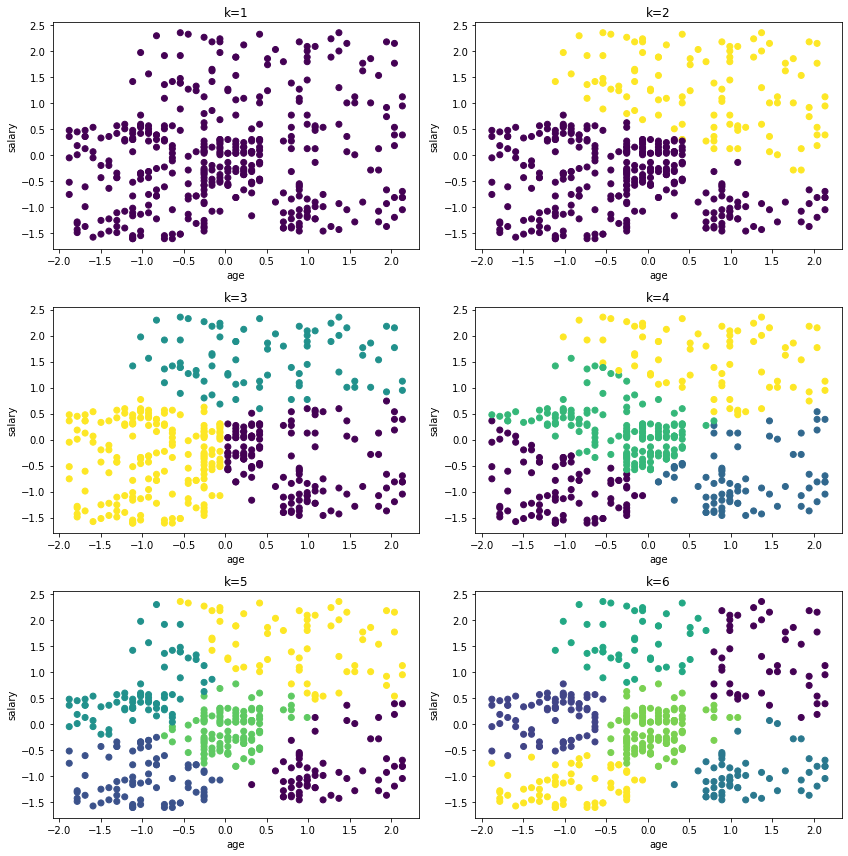

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))

for k in range(1,7):
  km = KMeans(n_clusters=k)
  km.fit(x_sc)
  ids = km.predict(x_sc)

  plt.subplot(3,2, k)
  plt.tight_layout()

  plt.title(f'k={k}')
  plt.xlabel('age')
  plt.ylabel('salary')

  plt.scatter(x_sc[:,0], x_sc[:,1], c=ids)

plt.show()


In [7]:
k=2
km_2 = KMeans(n_clusters=k)
km_2.fit(x_sc)

km_df_2 = purchase.copy()
ids = km_2.predict(x_sc)

km_df_2['cluster'] = ids
km_df_2.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,cluster
0,15624510,Male,19,19000,0,0
1,15810944,Male,35,20000,0,0
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,0


In [8]:
km_df_2[km_df_2['Purchased'] != km_df_2['cluster']]

,User ID,Gender,Age,EstimatedSalary,Purchased,cluster
16,15733883,Male,47,25000,1,0
17,15617482,Male,45,26000,1,0
18,15704583,Male,46,28000,1,0
19,15621083,Female,48,29000,1,0
20,15649487,Male,45,22000,1,0
...,...,...,...,...,...,...
393,15635893,Male,60,42000,1,0
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,0
397,15654296,Female,50,20000,1,0


In [9]:
print(sum(km_df_2['Purchased'] != km_df_2['cluster'])/len(km_df_2))

0.1775
